<a href="https://colab.research.google.com/github/DanielAndresSmg/Home-Credit-Default-Risk/blob/main/Exploratory%20Data%20Analysis%20(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset Preparation

In [ ]:
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import scipy.stats as stats 
import plotly.graph_objs as go

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
application_train = pd.read_csv('/content/gdrive/MyDrive/Dataset/Project/application_train.csv')

In [ ]:
application_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [ ]:
print('Size of application_train data', application_train.shape)

Size of application_train data (307511, 122)


Terdapat total 307.511 baris yang memuat informasi pinjaman dan terdapat 122 variabel.

In [ ]:
application_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [ ]:
total = application_train.isnull().sum().sort_values(ascending = False)
percent = (application_train.isnull().sum()/application_train.isnull().count()*100).sort_values(ascending = False)
missing_application_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_application_train_data.head(20)

Total    Percent
COMMONAREA_MEDI           214865  69.872297
COMMONAREA_AVG            214865  69.872297
COMMONAREA_MODE           214865  69.872297
NONLIVINGAPARTMENTS_MODE  213514  69.432963
NONLIVINGAPARTMENTS_AVG   213514  69.432963
NONLIVINGAPARTMENTS_MEDI  213514  69.432963
FONDKAPREMONT_MODE        210295  68.386172
LIVINGAPARTMENTS_MODE     210199  68.354953
LIVINGAPARTMENTS_AVG      210199  68.354953
LIVINGAPARTMENTS_MEDI     210199  68.354953
FLOORSMIN_AVG             208642  67.848630
FLOORSMIN_MODE            208642  67.848630
FLOORSMIN_MEDI            208642  67.848630
YEARS_BUILD_MEDI          204488  66.497784
YEARS_BUILD_MODE          204488  66.497784
YEARS_BUILD_AVG           204488  66.497784
OWN_CAR_AGE               202929  65.990810
LANDAREA_MEDI             182590  59.376738
LANDAREA_MODE             182590  59.376738
LANDAREA_AVG              182590  59.376738

Penghitungan jumlah dan persentase nilai yang hilang (missing values) dalam set data. Data frame ini menunjukkan kolom-kolom dengan jumlah nilai yang hilang (Total) dan persentase nilai yang hilang (Percent) dalam urutan menurun. Kolom  COMMONAREA_MODE, COMMONAREA_MEDI, dan COMMONAREA_AVG memiliki jumlah dan persentase nilai yang hilang tertinggi.








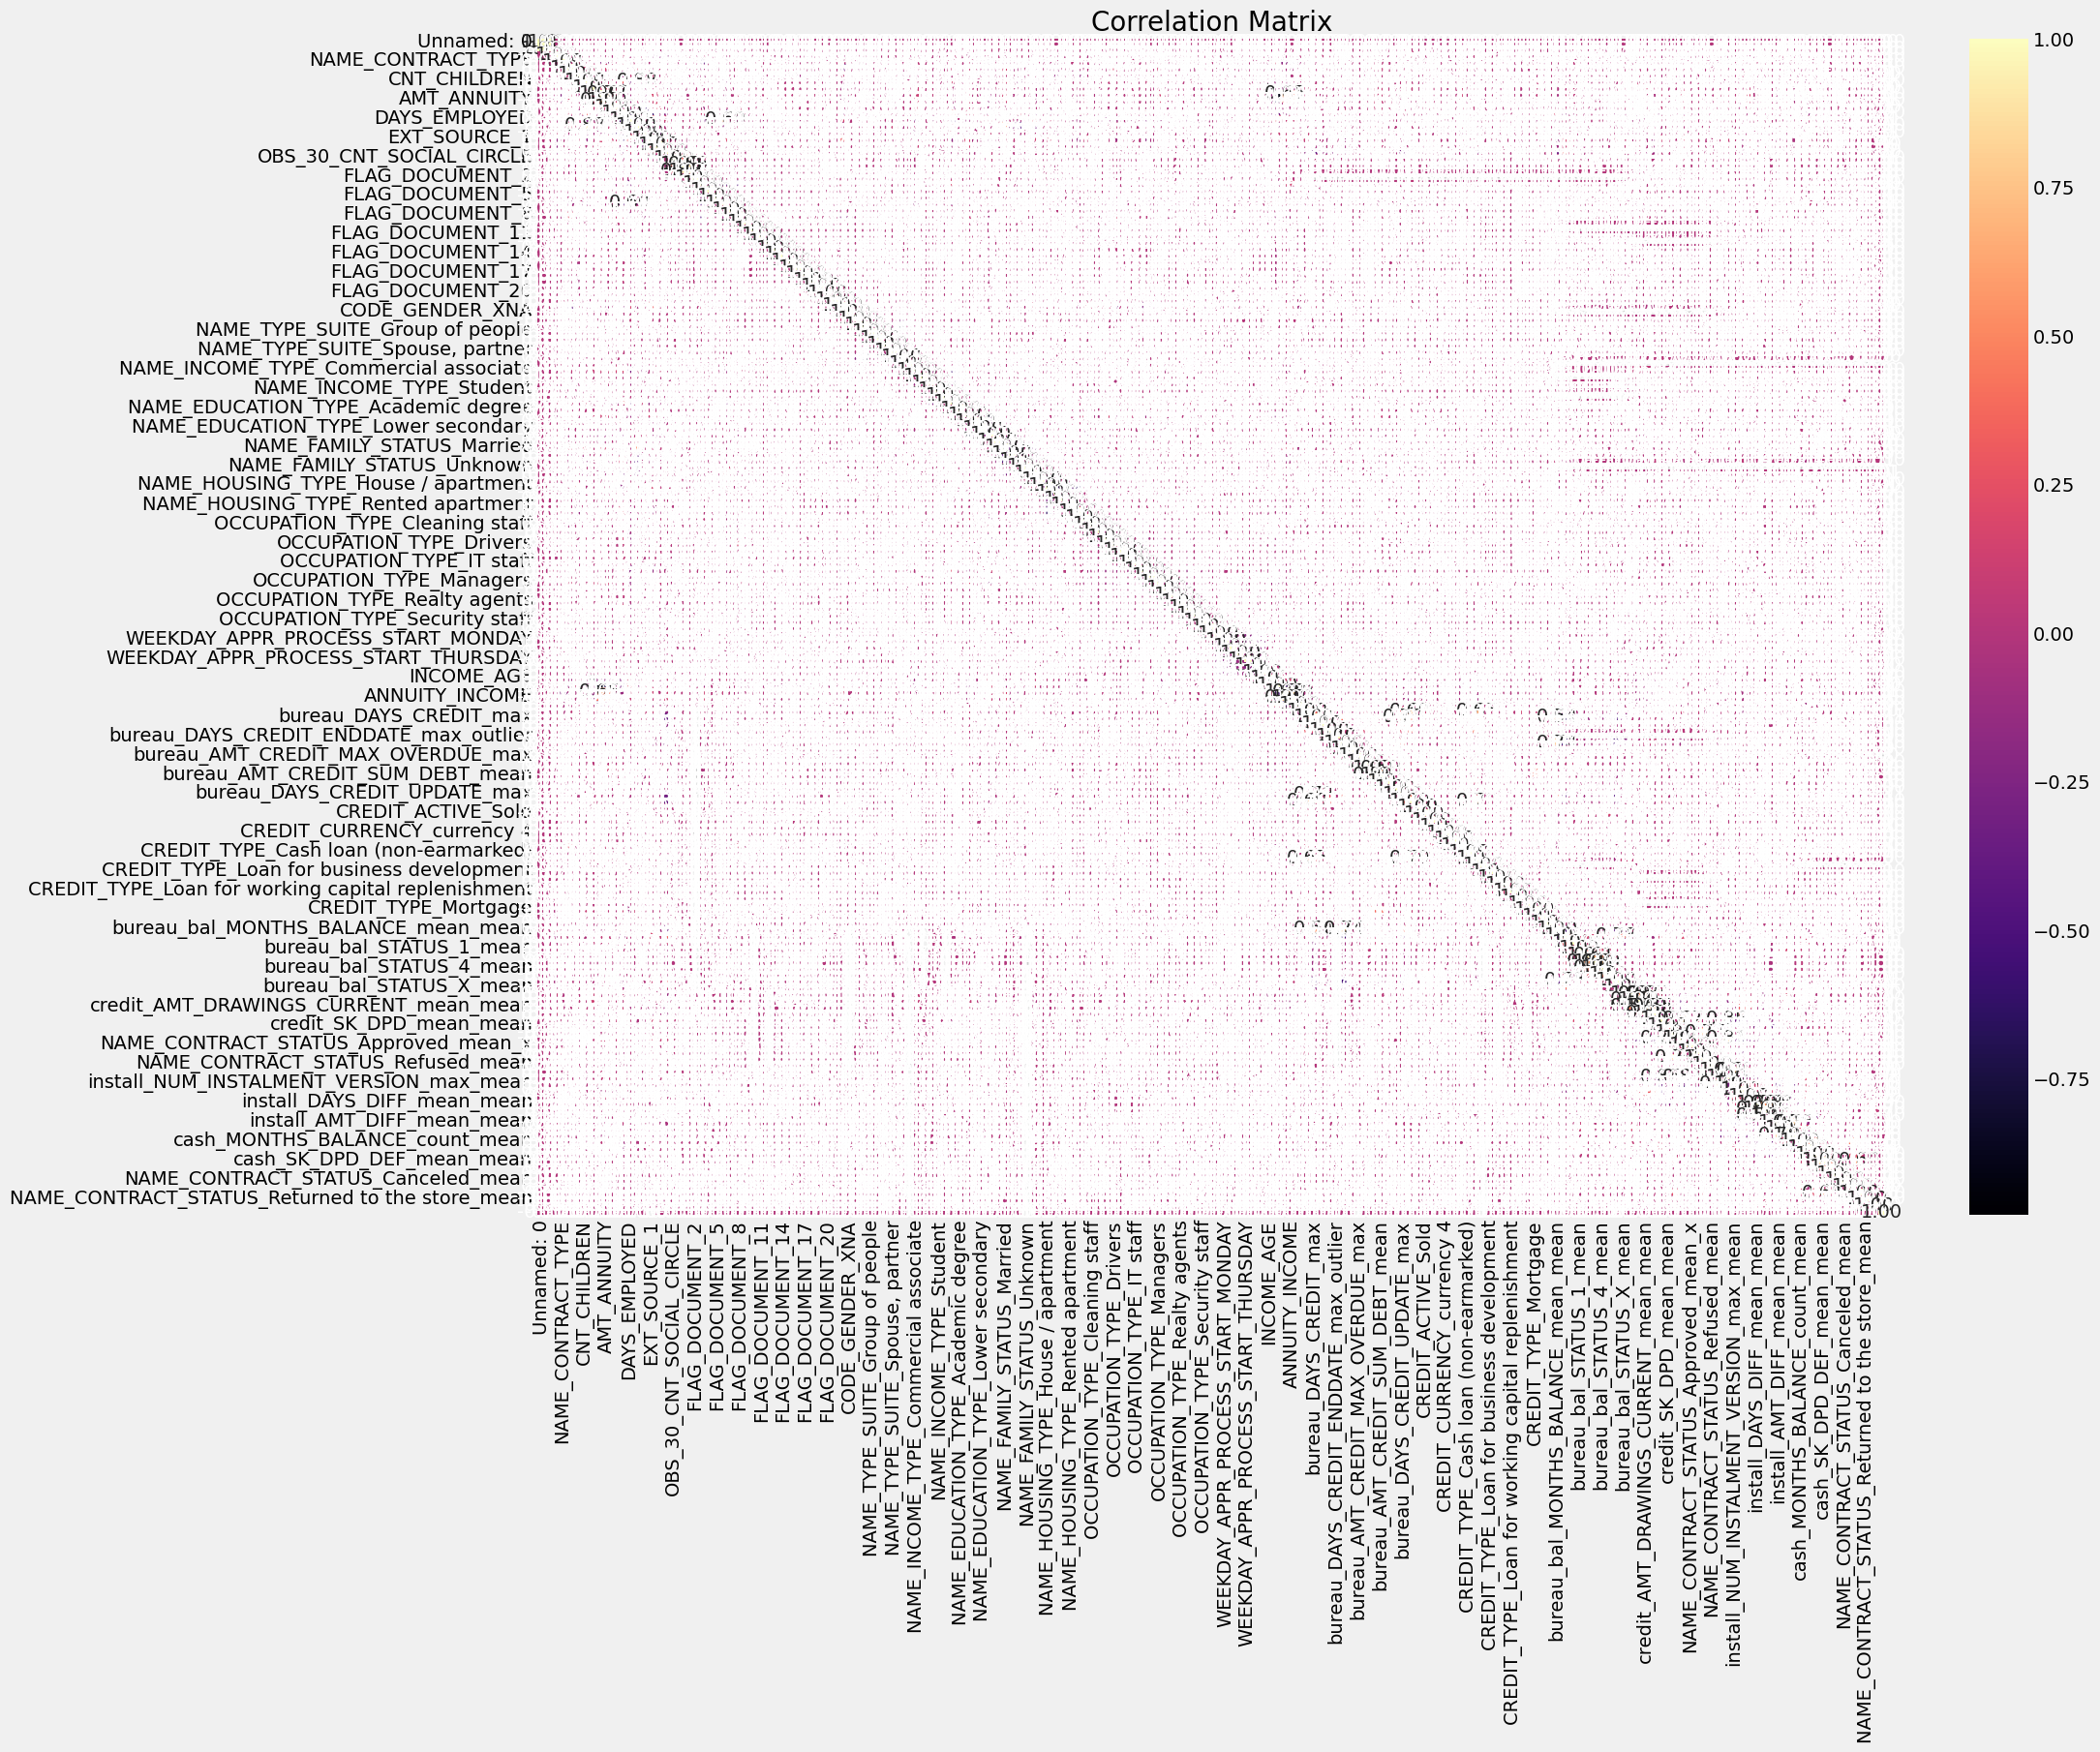

In [ ]:
# Correlation Matrix
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(application_train.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

##Distribusi variabel target

In [ ]:
path = "../input/"

def bar_hor(df, col, title, color, w=None, h=None, lm=0, limit=100, return_trace=False, rev=False, xlb = False):
    cnt_srs = df[col].value_counts()
    yy = cnt_srs.head(limit).index[::-1] 
    xx = cnt_srs.head(limit).values[::-1] 
    if rev:
        yy = cnt_srs.tail(limit).index[::-1] 
        xx = cnt_srs.tail(limit).values[::-1] 
    if xlb:
        trace = go.Bar(y=xlb, x=xx, orientation = 'h', marker=dict(color=color))
    else:
        trace = go.Bar(y=yy, x=xx, orientation = 'h', marker=dict(color=color))
    if return_trace:
        return trace 
    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

def bar_hor_noagg(x, y, title, color, w=None, h=None, lm=0, limit=100, rt=False):
    trace = go.Bar(y=x, x=y, orientation = 'h', marker=dict(color=color))
    if rt:
        return trace
    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)


def bar_ver_noagg(x, y, title, color, w=None, h=None, lm=0, rt = False):
    trace = go.Bar(y=y, x=x, marker=dict(color=color))
    if rt:
        return trace
    layout = dict(title=title, margin=dict(l=lm), width=w, height=h)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)
    
def gp(col, title):
    df1 = application_train[application_train["TARGET"] == 1]
    df0 = application_train[application_train["TARGET"] == 0]
    a1 = df1[col].value_counts()
    b1 = df0[col].value_counts()
    
    total = dict(application_train[col].value_counts())
    x0 = a1.index
    x1 = b1.index
    
    y0 = [float(x)*100 / total[x0[i]] for i,x in enumerate(a1.values)]
    y1 = [float(x)*100 / total[x1[i]] for i,x in enumerate(b1.values)]

    trace1 = go.Bar(x=a1.index, y=y0, name='Target : 1', marker=dict(color="#96D38C"))
    trace2 = go.Bar(x=b1.index, y=y1, name='Target : 0', marker=dict(color="#FEBFB3"))
    return trace1, trace2 

In [ ]:
bar_hor(application_train, "TARGET", "Distribution of Target Variable" , ["#44ff54", '#ff4444'], h=350, w=600, lm=200, xlb = ['Target : 1','Target : 0'])

Variabel target dalam dataset ini sedikit tidak seimbang dengan mayoritas pinjaman memiliki target yang sama dengan 0, yang menunjukkan bahwa individu tidak mengalami masalah dalam membayar cicilan tepat waktu. Terdapat sekitar 91% pinjaman atau sekitar 282 ribu aplikasi pinjaman dengan target = 0, sedangkan hanya 9% dari total pinjaman (sekitar 24 ribu aplikasi) dalam dataset ini melibatkan aplikasi yang mengalami masalah dalam membayar pinjaman atau melakukan cicilan.
**Noted:** Dalam kasus ini, Anda mungkin perlu menggunakan teknik penanganan ketidakseimbangan kelas seperti **oversampling**, **undersampling**, atau menggunakan algoritma khusus yang sensitif terhadap ketidakseimbangan kelas. **Tambahan**: target 0= bayar tepat waktu, target 1 = sering bermasalah untuk bayar tepat waktu

##Gender Type of Applicants

In [ ]:
tr0 = bar_hor(application_train, "CODE_GENDER", "Distribution of CODE_GENDER Variable" ,"#f975ae", w=700, lm=100, return_trace= True)
tr1, tr2 = gp('CODE_GENDER', 'Distribution of Target with Applicant Gender')

fig = tools.make_subplots(rows=1, cols=3, print_grid=False, subplot_titles = ["Gender Distribution" , "Gender, Target=1" ,"Gender, Target=0"])
fig.append_trace(tr0, 1, 1);
fig.append_trace(tr1, 1, 2);
fig.append_trace(tr2, 1, 3);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=50));
iplot(fig);

/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



Dalam data aplikasi pinjaman, perempuan telah mengajukan mayoritas pinjaman yang hampir dua kali lipat lebih banyak dibandingkan laki-laki. Secara total, terdapat sekitar 202.448 aplikasi pinjaman yang diajukan oleh perempuan dibandingkan dengan sekitar 105.059 aplikasi yang diajukan oleh laki-laki. Namun, persentase yang lebih besar (sekitar 10% dari total) laki-laki mengalami masalah dalam membayar pinjaman atau melakukan cicilan tepat waktu dibandingkan dengan aplikasi perempuan (sekitar 7%).

##Age of Applicants

In [ ]:
tr0 = bar_hor(age, "Distribution of CODE_GENDER Variable", "#f975ae", w=700, lm=100, return_trace=True)


In [ ]:
tr0 = bar_hor(age, "Distribution of CODE_GENDER Variable", "#f975ae", w=700, lm=100, return_trace=True)
tr1, tr2 = gp(age, 'Distribution of Target with Applicant Gender')

fig = tools.make_subplots(rows=1, cols=3, print_grid=False, subplot_titles = ["Gender Distribution" , "Gender, Target=1" ,"Gender, Target=0"])
fig.append_trace(tr0, 1, 1);
fig.append_trace(tr1, 1, 2);
fig.append_trace(tr2, 1, 3);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=50));
iplot(fig);

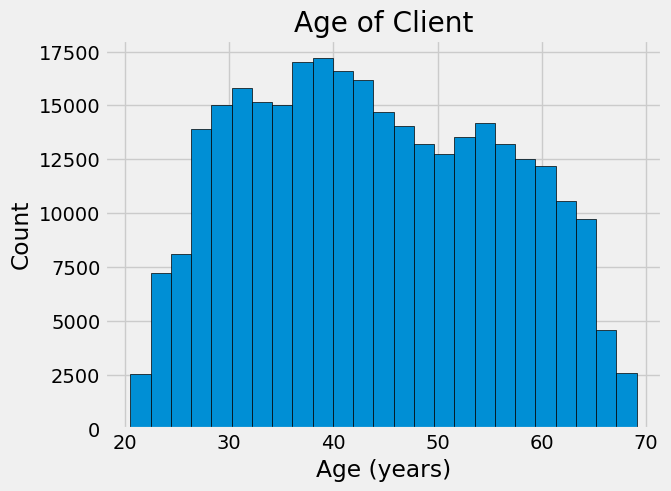

In [ ]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist(application_train['DAYS_BIRTH'] / -365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

In [ ]:
age = application_train['DAYS_BIRTH'] / -365

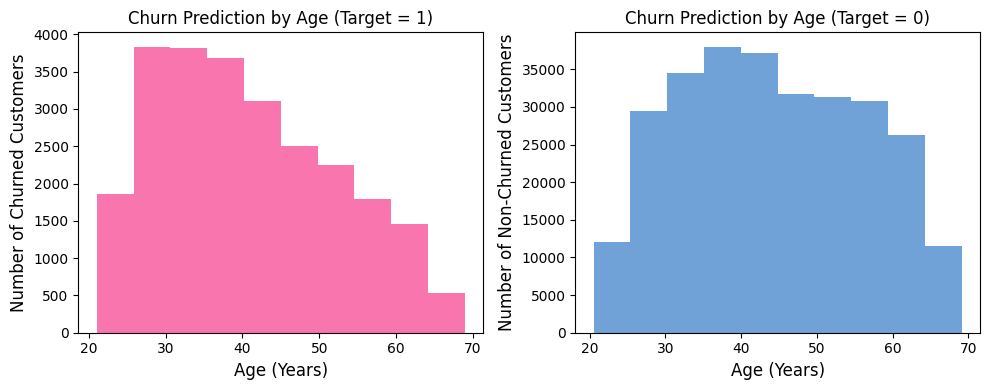

In [ ]:
import matplotlib.pyplot as plt

# Subset data for churned customers (target = 1)
churned_customers = application_train[application_train['TARGET'] == 1]

# Subset data for non-churned customers (target = 0)
non_churned_customers = application_train[application_train['TARGET'] == 0]

# Calculate age in years
age_churned = churned_customers['DAYS_BIRTH'] / -365
age_non_churned = non_churned_customers['DAYS_BIRTH'] / -365

# Create subplots for side-by-side histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot histogram for churned customers
ax1.hist(age_churned, bins=10, color='#f975ae')
ax1.set_xlabel('Age (Years)',fontsize=12)
ax1.set_ylabel('Number of Churned Customers',fontsize=12)
ax1.set_title('Churn Prediction by Age (Target = 1)',fontsize=12)

# Plot histogram for non-churned customers
ax2.hist(age_non_churned, bins=10, color='#70a1d7')
ax2.set_xlabel('Age (Years)',fontsize=12)
ax2.set_ylabel('Number of Non-Churned Customers',fontsize=12)
ax2.set_title('Churn Prediction by Age (Target = 0)',fontsize=12)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
age.value_counts()

37.668493    43
36.934247    42
49.994521    41
27.452055    41
43.208219    40
             ..
68.213699     1
68.131507     1
21.964384     1
68.761644     1
68.660274     1
Name: DAYS_BIRTH, Length: 17460, dtype: int64

<ipython-input-49-16a4f050328d>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




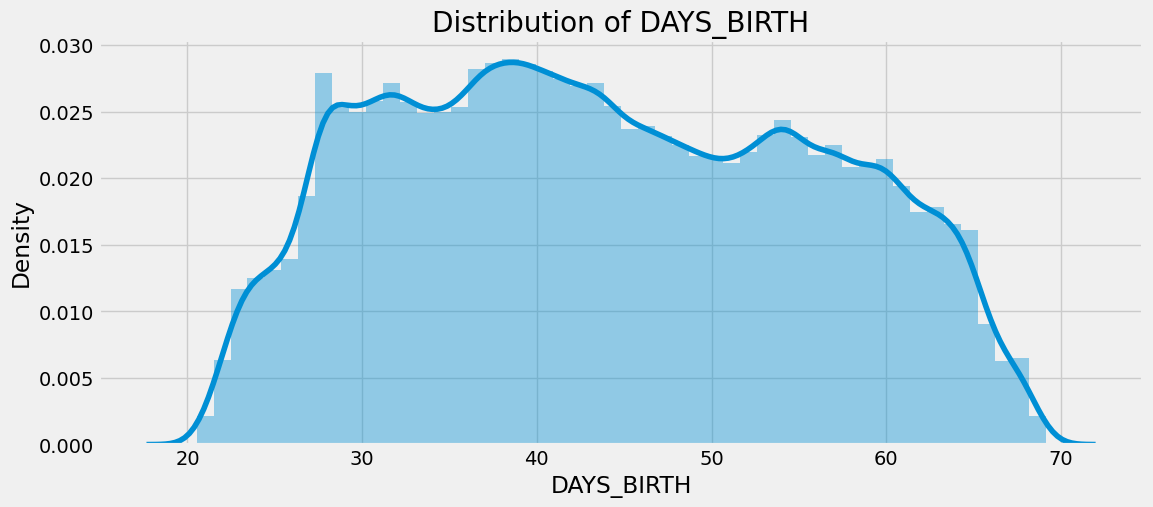

In [ ]:
plt.figure(figsize=(12,5))
plt.title("Distribution of DAYS_BIRTH")
ax = sns.distplot(application_train['DAYS_BIRTH'] / -365)

In [ ]:
ax=sns.countplot(x=['DAYS_BIRTH'] / -365,hue='Target',data=application_train)
for container in ax.containers:
    ax.bar_label(container)

TypeError: ignored

In [ ]:
#UMUR
def calculate_age(birth_date):
    age = (datetime.now().date() - birth_date).days / 365
    return round(age)

# Contoh pemanggilan fungsi
birth_date = datetime.date(1990, 5, 21)
age = calculate_age(birth_date)
print(age)


# Mencari Lokasi Kolom age
age_loc = data.columns.get_loc(key='DAYS_BIRTH')

# Menyisipkan Kolom Baru Setelah Kolom Age
data.insert(
age_loc+1,
'UMUR',
data['DAYS_BIRTH'].apply(umur)
)

data[:5][['DAYS_BIRTH', 'UMUR']]

NameError: ignored

In [ ]:
# Fungsi Membuat Kategori Umur
def income(AGE):
if (AGE >= 11 and AGE <=26):
return 'Post Gen Z'
elif (AGE >= 27 and AGE <= 42):
return 'Gen Z'
elif (AGE >= 43 and AGE <= 58):
return 'Milenial'
elif (AGE >= 59 and AGE <= 77):
return 'Pre Boomer'


# Mencari Lokasi Kolom AGE_RANGE
income_loc = data.columns.get_loc(key='UMUR')

# Menyisipkan Kolom Baru Setelah Kolom Age
data.insert(
income_loc+1,
'UMUR_RANGE',
data['UMUR'].apply(income)
)

In [ ]:
umur_counts = data['UMUR_RANGE'].value_counts()
print(umur_counts)

##Family Status of Applicants

In [ ]:
tr0 = bar_hor(application_train, "NAME_FAMILY_STATUS", "Distribution of CODE_GENDER Variable" ,"#f975ae", w=700, lm=100, return_trace= True)
tr1, tr2 = gp('NAME_FAMILY_STATUS', 'Distribution of Target with Applicant Gender')

fig = tools.make_subplots(rows=1, cols=3, print_grid=False, subplot_titles = ["Family Status Distribution" , "Family Status, Target = 1" ,"Family Status, Target = 0"])
fig.append_trace(tr0, 1, 1);
fig.append_trace(tr1, 1, 2);
fig.append_trace(tr2, 1, 3);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=120));
iplot(fig);

/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



Orang yang menikah telah mengajukan sejumlah besar aplikasi pinjaman sekitar 196 ribu, Namun, orang yang memiliki Pernikahan Sipil memiliki persentase tertinggi (sekitar 10%) dari masalah dan tantangan dalam membayar pinjaman.

##Properti berupa real estate atau car

In [ ]:
# Pie chart: Applicants Owning Real Estate
t = application_train['FLAG_OWN_REALTY'].value_counts()
labels = t.index
values = t.values
colors = ['#96D38C', '#FEBFB3']
trace1 = go.Pie(labels=labels, values=values,
                hoverinfo='label+percent', textinfo='value',
                textfont=dict(size=12),
                marker=dict(colors=colors,
                            line=dict(color='#fff', width=2)))
layout1 = go.Layout(title='Applicants Owning Real Estate', height=400)
fig1 = go.Figure(data=[trace1], layout=layout1)
iplot(fig1)
# Pie chart: Applicants Owning Car
t = application_train['FLAG_OWN_CAR'].value_counts()
labels = t.index
values = t.values
colors = ['#FEBFB3', '#96D38C']
trace2 = go.Pie(labels=labels, values=values,
                hoverinfo='label+percent', textinfo='value',
                textfont=dict(size=12),
                marker=dict(colors=colors,
                            line=dict(color='#fff', width=2)))
layout2 = go.Layout(title='Applicants Owning Car', height=400)
fig2 = go.Figure(data=[trace2], layout=layout2)
iplot(fig2)

Sekitar 70% dari pelamar memiliki properti real estate, sedangkan hanya 34% dari pelamar yang memiliki mobil yang telah mengajukan pinjaman dalam beberapa tahun terakhir. Namun, persentase yang lebih tinggi dari orang-orang yang mengalami kesulitan pembayaran diamati pada pelamar yang tidak memiliki mobil atau properti real estate.

In [ ]:
## Subplots: Applicants Owning Real Estate and Car with Target Variable
# Data for bar chart
x = ['Y', 'N']
y_target_1 = [7.96, 8.32]
y_target_0 = [92.04, 91.68]

# Create bar traces
trace1 = go.Bar(x=x, y=y_target_1, name='Target : 1', marker=dict(color='#96D38C'))
trace2 = go.Bar(x=x, y=y_target_0, name='Target : 0', marker=dict(color='#FEBFB3'))

# Create subplot figure
fig = tools.make_subplots(rows=1, cols=2, subplot_titles=['% Applicants with RealEstate and Target = 1', '% Applicants with Car and Target = 1'])
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)

# Update layout
fig['layout'].update(height=350, showlegend=False, margin=dict(l=120))

# Plot the figure
iplot(fig)


/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



##Suite Type and Income Type of Applicants

In [ ]:
tr0 = bar_hor(application_train, "NAME_TYPE_SUITE_Family", "Distribution of CODE_GENDER Variable" ,"#f975ae", w=700, lm=100, return_trace= True)
tr1 = bar_hor(application_train, "NAME_TYPE_SUITE_Family", "Distribution of CODE_GENDER Variable" ,"#f975ae", w=700, lm=100, return_trace= True)

fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = ['Applicants Suite Type' , 'Applicants Income Type'])
fig.append_trace(tr0, 1, 1);
fig.append_trace(tr1, 1, 2);
fig['layout'].update(height=400, showlegend=False, margin=dict(l=100));
iplot(fig);

/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



> Tiga jenis suite teratas yang mengajukan pinjaman adalah:
- Tanpa pendamping (sekitar 248 ribu pelamar)
- Keluarga (sekitar 40 ribu pelamar)
- Pasangan (sekitar 11 ribu pelamar)

> Jenis penghasilan yang dimiliki oleh pelamar pinjaman mencakup sekitar 8 kategori, yang teratas adalah:
- Karyawan (158 ribu pelamar)
- Karyawan Swasta (71 ribu pelamar)
- Pensiunan (55 ribu pelamar)

## How does Target Varies with Suite and Income Type of Applicants

In [ ]:
tr1, tr2 = gp('NAME_TYPE_SUITE', 'Applicants Type Suites which repayed the loan')
fig = tools.make_subplots(rows=1, cols=2, print_grid=False, 
                          subplot_titles = ["Applicants Type Suites distribution when Target = 1", "Applicants Type Suites distribution when Target = 0"])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr2, 1, 2);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=120));
iplot(fig);


tr1, tr2 = gp('NAME_INCOME_TYPE', 'Applicants Income Types which repayed the loan')
fig = tools.make_subplots(rows=1, cols=2, print_grid=False, 
                          subplot_titles = ["Applicants Income Types when Target = 1", "Applicants Income Type When Target = 0"])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr2, 1, 2);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=120));
iplot(fig);

/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



Dari hasil analisis, terlihat bahwa pelamar dengan jenis penghasilan Cuti Melahirkan dan Pengangguran memiliki persentase tertinggi (sekitar 40% dan 36%) untuk Target = 1, yang berarti memiliki lebih banyak masalah pembayaran. Sementara itu, Pensiunan memiliki persentase terendah (sekitar 5,3%).

##Applicant's Contract Type

In [ ]:
# Data for pie chart
labels = ['Y', 'N']
values = [7.96, 92.04]
colors = ['#96D38C', '#FEBFB3']

# Create pie trace
trace = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', textinfo='value',
               textfont=dict(size=12),
               marker=dict(colors=colors,
                           line=dict(color='#fff', width=2)))

# Set layout
layout = go.Layout(title='Applicants Owning Real Estate', height=400)

# Create figure
fig = go.Figure(data=[trace], layout=layout)

# Plot the figure
iplot(fig)


Jumlah pinjaman dengan jenis Cash loans mencapai sekitar 278 ribu, yang merupakan mayoritas dari seluruh data pinjaman dalam dataset ini. Sedangkan jumlah pinjaman dengan jenis Revolving loans jauh lebih sedikit, hanya sekitar 29 ribu dibandingkan dengan Cash loans.

**Note**

Cash loans adalah jenis pinjaman di mana peminjam menerima uang dalam jumlah tertentu dan membayarnya kembali dalam cicilan tetap selama jangka waktu yang telah ditentukan sebelumnya.


*   *contoh*:
*   Pinjaman ini biasanya digunakan untuk keperluan yang spesifik, seperti membeli rumah, mobil, atau membiayai proyek tertentu. Angsuran bulanan yang tetap biasanya diberlakukan selama periode pinjaman. Cash loans biasanya memiliki suku bunga tetap atau variabel.List item

Revolving loans adalah jenis pinjaman di mana peminjam diberikan batas kredit maksimum dan dapat mengambil sebagian atau seluruh jumlah uang yang diperlukan hingga batas kredit tersebut, dengan pembayaran bunga atas jumlah yang dipinjam dan membayar jumlah minimum setiap bulan.


*   *contoh*
*   Misalnya, kartu kredit adalah bentuk umum dari revolving loan di mana peminjam dapat menggunakan kredit yang tersedia dalam batas tertentu dan membayarnya kembali sesuai dengan jumlah yang mereka gunakan. Revolving loans biasanya memiliki suku bunga yang lebih tinggi daripada cash loans.

Perbedaan utama antara **Cash loans** dan **Revolving** loans terletak pada cara pinjaman diberikan dan digunakan oleh peminjam. Cash loans memberikan pinjaman lump sum dengan jadwal pembayaran tetap, sedangkan Revolving loans memberikan akses fleksibel ke dana yang dapat dipinjam ulang sesuai kebutuhan.

##Education Type and Housing Type

In [ ]:
tr1 = bar_hor(application_train, "NAME_EDUCATION_TYPE", "Distribution of " ,"#f975ae", w=700, lm=100, return_trace= True)
tr2 = bar_hor(application_train, "NAME_HOUSING_TYPE", "Distribution of " ,"#f975ae", w=700, lm=100, return_trace = True)

fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = ['Applicants Education Type', 'Applicants Housing Type' ])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr2, 1, 2);
fig['layout'].update(height=400, showlegend=False, margin=dict(l=100));
iplot(fig);


tr1, tr2 = gp('NAME_EDUCATION_TYPE', 'Applicants Income Types which repayed the loan')
tr3, tr4 = gp('NAME_HOUSING_TYPE', 'Applicants Income Types which repayed the loan')
fig = tools.make_subplots(rows=1, cols=2, print_grid=False, 
                          subplot_titles = ["Applicants Education Types, Target=1", "Applicants Housing Type, Target=1"])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr3, 1, 2);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=30));
iplot(fig);

/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



Jumlah aplikasi pinjaman terbanyak (sekitar 218 ribu) diajukan oleh orang-orang yang memiliki pendidikan menengah, diikuti oleh orang-orang yang memiliki pendidikan tinggi dengan jumlah aplikasi sekitar 75 ribu. Orang-orang yang tinggal di rumah atau apartemen memiliki jumlah aplikasi pinjaman terbanyak sekitar 272 ribu. Namun, kami melihat bahwa pelamar dengan status pendidikan menengah ke bawah memiliki persentase masalah pembayaran yang lebih tinggi. Selain itu, pelamar yang tinggal di apartemen atau tinggal bersama orang tua juga menunjukkan tren yang sama.

##Organization and Occupation Type applies for loan and which repays 

**Jenis organisasi dan jenis pekerjaan yang mengajukan pinjaman serta jenis pekerjaan yang berhasil membayar pinjaman dengan baik**

In [ ]:
tr1 = bar_hor(application_train, "ORGANIZATION_TYPE", "Distribution of " ,"#f975ae", w=700, lm=100, return_trace= True)
tr2 = bar_hor(application_train, "OCCUPATION_TYPE", "Distribution of " ,"#f975ae", w=700, lm=100, return_trace = True)
fig = tools.make_subplots(rows=1, cols=2, print_grid=False, subplot_titles = ['Applicants Organization Type', 'Applicants Occupation Type' ])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr2, 1, 2);
fig['layout'].update(height=600, showlegend=False, margin=dict(l=150));
iplot(fig);

/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



###Target Variable with respect to Organization and Occupation Type

**Bagaimana variabel target (dalam hal ini, mungkin merupakan status pembayaran pinjaman atau kemampuan untuk membayar cicilan tepat waktu) berkaitan dengan jenis organisasi dan jenis pekerjaan dari para peminjam.**

In [ ]:
tr1, tr2 = gp('ORGANIZATION_TYPE', 'Applicants Income Types which repayed the loan')
tr3, tr4 = gp('OCCUPATION_TYPE', 'Applicants Income Types which repayed the loan')
fig = tools.make_subplots(rows=1, cols=2, print_grid=False, 
                          subplot_titles = ["Applicants Organization Types - Repayed", "Applicants Occupation Type - Repayed"])
fig.append_trace(tr1, 1, 1);
fig.append_trace(tr3, 1, 2);
fig['layout'].update(height=350, showlegend=False, margin=dict(l=120));
iplot(fig);

/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



#Exploration of Bureau Data

Data kredit sebelumnya dari lembaga keuangan lain yang dilaporkan ke Credit Bureau (untuk klien yang memiliki pinjaman dalam sampel kami). Untuk setiap pinjaman dalam sampel kami, terdapat banyak baris sebanyak jumlah kredit yang dimiliki klien di Credit Bureau sebelum tanggal aplikasi.

##Snapshot of Bureau Data

"Bureau data" merujuk pada data kredit sebelumnya yang dilaporkan oleh klien ke lembaga kredit atau Credit Bureau. Data ini memberikan informasi tentang riwayat kredit seorang klien sebelumnya, termasuk jumlah pinjaman sebelumnya, pembayaran pinjaman, dan riwayat kredit lainnya yang dapat membantu dalam menentukan risiko kredit untuk aplikasi pinjaman yang diajukan.

In [ ]:
bureau = pd.read_csv('/content/gdrive/MyDrive/Dataset/Project/bureau.csv')
bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [ ]:
print('Size of bureau data', application_train.shape)

Size of bureau data (307511, 122)


In [ ]:
bureau.columns.values

array(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE',
       'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT',
       'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE',
       'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY'], dtype=object)

In [ ]:
total = bureau.isnull().sum().sort_values(ascending = False)
percent = (bureau.isnull().sum()/bureau.isnull().count()*100).sort_values(ascending = False)
missing_bureau_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_bureau_data.head(20)

Total    Percent
AMT_ANNUITY             1226791  71.473490
AMT_CREDIT_MAX_OVERDUE  1124488  65.513264
DAYS_ENDDATE_FACT        633653  36.916958
AMT_CREDIT_SUM_LIMIT     591780  34.477415
AMT_CREDIT_SUM_DEBT      257669  15.011932
DAYS_CREDIT_ENDDATE      105553   6.149573
AMT_CREDIT_SUM               13   0.000757
CREDIT_ACTIVE                 0   0.000000
CREDIT_CURRENCY               0   0.000000
DAYS_CREDIT                   0   0.000000
CREDIT_DAY_OVERDUE            0   0.000000
SK_ID_BUREAU                  0   0.000000
CNT_CREDIT_PROLONG            0   0.000000
AMT_CREDIT_SUM_OVERDUE        0   0.000000
CREDIT_TYPE                   0   0.000000
DAYS_CREDIT_UPDATE            0   0.000000
SK_ID_CURR                    0   0.000000

1. SK_BUREAU_ID: ID unik untuk setiap entri dalam dataset "bureau".
2. CREDIT_ACTIVE: Status kredit yang aktif, misalnya "Active", "Closed", "Sold", atau "Bad debt".
3. CREDIT_CURRENCY: Mata uang yang digunakan untuk kredit.
4. DAYS_CREDIT: Jumlah hari antara tanggal pengajuan kredit dengan tanggal pengamatan dalam dataset ini.
5. CREDIT_DAY_OVERDUE: Jumlah hari keterlambatan pembayaran kredit.
6. DAYS_CREDIT_ENDDATE: Jumlah hari sampai tanggal jatuh tempo kredit.
7. DAYS_ENDDATE_FACT: Jumlah hari antara tanggal jatuh tempo kredit dengan tanggal pengamatan dalam dataset ini.
8. AMT_CREDIT_MAX_OVERDUE: Jumlah maksimum tunggakan kredit yang belum dibayar.
9. CNT_CREDIT_PROLONG: Jumlah kali perpanjangan kredit dilakukan.
10. AMT_CREDIT_SUM: Jumlah total kredit yang diberikan.
11. AMT_CREDIT_SUM_DEBT: Jumlah total tunggakan kredit yang belum dibayar.
12. AMT_CREDIT_SUM_LIMIT: Batas kredit yang diberikan.
13. AMT_CREDIT_SUM_OVERDUE: Jumlah total kredit yang jatuh tempo.
14. CREDIT_TYPE: Jenis kredit yang diberikan, misalnya "Consumer credit", "Credit card", "Mortgage", dll.
15. DAYS_CREDIT_UPDATE: Jumlah hari antara tanggal pembaruan terakhir dalam dataset ini dengan tanggal pengamatan.
16. AMT_ANNUITY: Jumlah angsuran kredit.
17. SK_ID_CURR: ID unik untuk setiap aplikasi pinjaman dalam dataset "bureau".




##Merge application_train with bureau.

In [ ]:
application_bureau_train = application_train.merge(bureau, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [ ]:
application_bureau_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100002       1         Cash loans           M            N   
2      100002       1         Cash loans           M            N   
3      100002       1         Cash loans           M            N   
4      100002       1         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY_x  \
0               Y             0          202500.0    406597.5        24700.5   
1               Y             0          202500.0    406597.5        24700.5   
2               Y             0          202500.0    406597.5        24700.5   
3               Y             0          202500.0    406597.5        24700.5   
4               Y             0          202500.0    406597.5        24700.5   

   ...  DAYS_ENDDATE_FACT AMT_CREDIT_MAX_OVERDUE CNT_CREDIT_PROLONG  \
0  ...            -1038.0                    NaN                  0   
1  ...              -48.0                    NaN                  0   
2  ...            -1185.0                  0.000                  0   
3  ...             -911.0               3321.000                  0   
4  ...              -36.0               5043.645                  0   

  AMT_CREDIT_SUM AMT_CREDIT_SUM_DEBT AMT_CREDIT_SUM_LIMIT  \
0        40761.0                 NaN                  NaN   
1            0.0                 0.0                  NaN   
2       135000.0                 0.0                  0.0   
3        19071.0                 NaN                  NaN   
4       120735.0                 0.0                  0.0   

   AMT_CREDIT_SUM_OVERDUE      CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY_y  
0                     0.0      Credit card               -1038            0.0  
1                     0.0      Credit card                 -47            NaN  
2                     0.0  Consumer credit               -1185            0.0  
3                     0.0  Consumer credit                -906            0.0  
4                     0.0  Consumer credit                 -34            0.0  

[5 rows x 138 columns]

In [ ]:
print("The resulting dataframe `application_bureau_train` has ",application_bureau_train.shape[0]," rows and ", 
      application_bureau_train.shape[1]," columns.")

The resulting dataframe `application_bureau_train` has  1465325  rows and  138  columns.


##Analize the application_bureau_train data.

In [ ]:
def plot_b_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = application_bureau_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application_bureau_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
      fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

###CREDIT STATUS



1.   "Sold": Mengacu pada kredit yang telah dijual kepada pihak ketiga. Ini mungkin terjadi ketika kreditur memutuskan untuk mentransfer kepemilikan kredit kepada pihak lain, seperti perusahaan penagih utang.
2.   "Active": Merujuk pada kredit yang sedang berlangsung atau belum diselesaikan. Kredit ini masih aktif dan pembayaran cicilan masih berlangsung.
3. "Closed": Mengindikasikan bahwa kredit telah selesai atau diselesaikan. Ini bisa terjadi setelah pembayaran cicilan terakhir dilakukan dan kredit lunas, atau mungkin juga karena alasan lain seperti restrukturisasi kredit atau penghapusan hutang.
4. "Bad debt": Menunjukkan bahwa kredit tersebut menjadi utang bermasalah atau tidak dapat dipulihkan. Kredit dengan status "Bad debt" menunjukkan adanya masalah dalam pembayaran cicilan dan dinyatakan sebagai utang macet atau tidak bisa dibayar kembali.



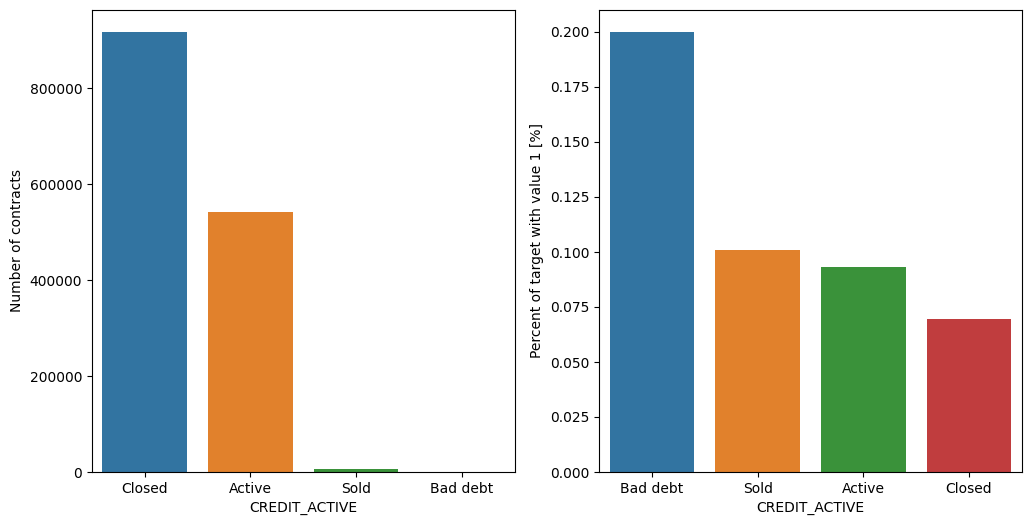

In [ ]:
plot_b_stats('CREDIT_ACTIVE')

Sebagian besar kredit yang terdaftar di Credit Bureau memiliki status "Closed" (sekitar 900 ribu). Di posisi kedua adalah kredit "Active" (kurang dari 600 ribu). "Sold" dan "Bad debt" hanya ada dalam jumlah yang sedikit.

Pada saat yang sama, sebagai persentase dari total jumlah per kategori, klien dengan kredit yang terdaftar di Credit Bureau dengan status "Bad debt" memiliki 20% default pada aplikasi saat ini.

Klien dengan kredit "Sold", "Active", dan "Closed" memiliki persentase TARGET=1 (default kredit) sebesar atau kurang dari 10% (10% merupakan tingkat keseluruhan). Tingkat default kredit terendah dimiliki oleh klien dengan kredit yang terdaftar di Credit Bureau dengan status "Closed".

Hal ini menunjukkan bahwa riwayat kredit sebelumnya yang terdaftar di Credit Bureau adalah prediktor yang kuat untuk default kredit, karena persentase aplikasi yang mengalami default dengan riwayat "Bad debt" dua kali lebih besar daripada "Sold" atau "Active", dan hampir tiga kali lebih besar daripada "Closed".

In [ ]:
application_bureau_train['CREDIT_ACTIVE'].value_counts()

Closed      917733
Active      541919
Sold          5653
Bad debt        20
Name: CREDIT_ACTIVE, dtype: int64

##CREDIT CURRENCY

Periksa jumlah kredit yang terdaftar di Credit Bureau dengan mata uang yang berbeda. Selain itu, periksa persentase kredit yang mengalami default (for current applications) berdasarkan mata uang kredit yang terdaftar di Credit Bureau di masa lalu untuk klien yang sama.

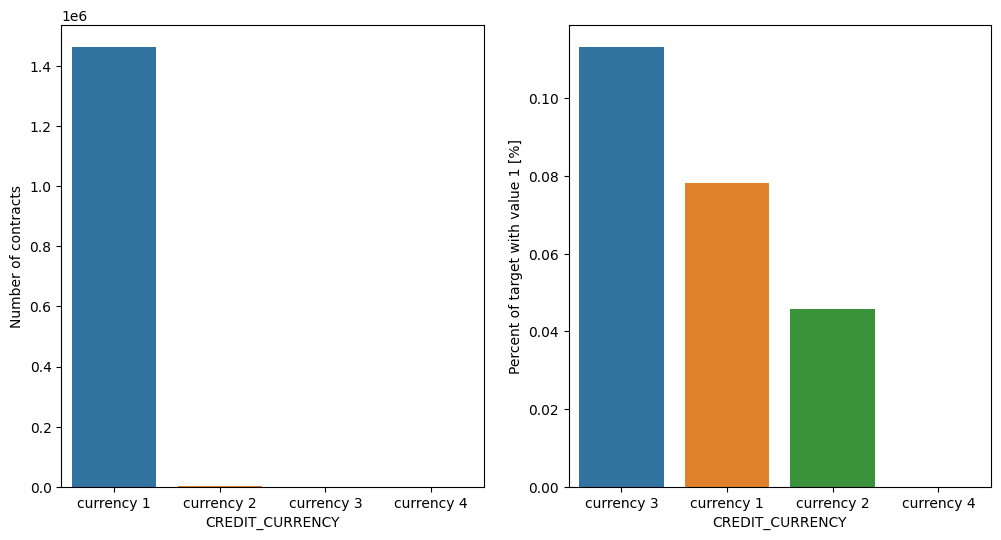

In [ ]:
plot_b_stats('CREDIT_CURRENCY')

Kredit-kredit sebagian besar dalam mata uang currency_1.

Berdasarkan mata uang tersebut, persentase klien yang mengalami default cukup berbeda. Dimulai dengan currency_3, kemudian currency_1, dan currency_2, persentase klien yang mengalami default adalah 11%, 8%, dan 5%. Persentase aplikasi yang mengalami default bagi klien yang memiliki kredit terdaftar dengan mata uang currency_4 mendekati 0.

In [ ]:
application_bureau_train['CREDIT_CURRENCY'].value_counts()

currency 1    1464094
currency 2       1072
currency 3        150
currency 4          9
Name: CREDIT_CURRENCY, dtype: int64

##CREDIT TYPE

Memeriksa tipe kredit yang terdaftar di Credit Bureau

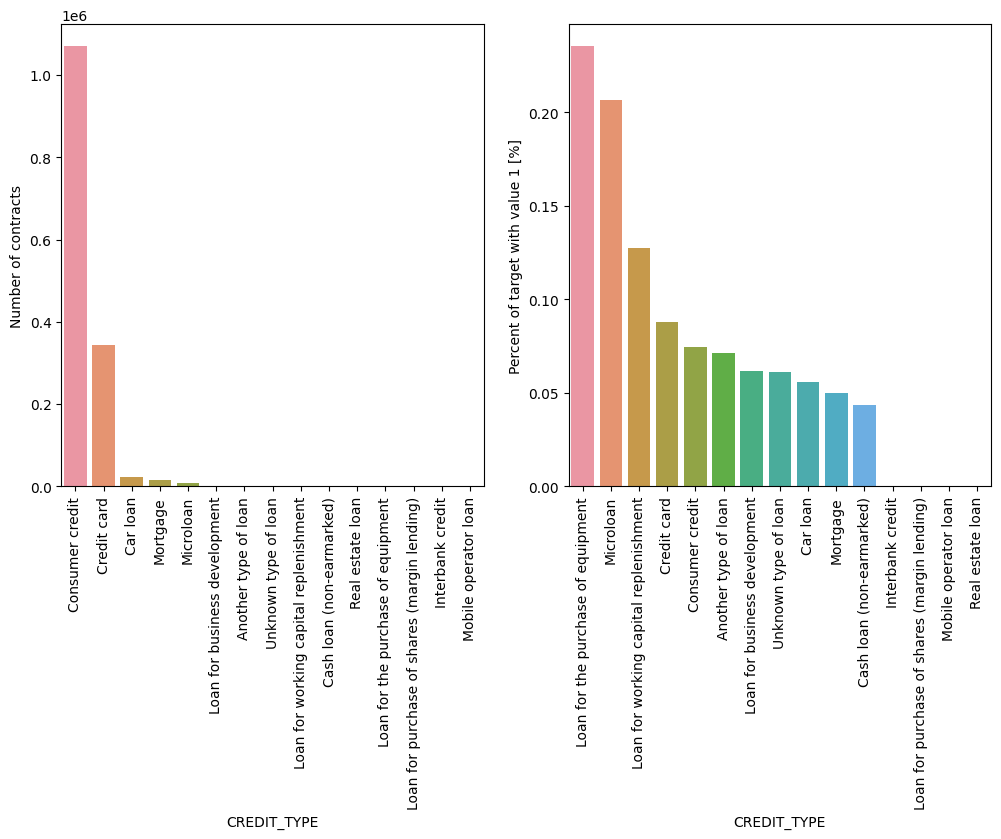

In [ ]:
plot_b_stats('CREDIT_TYPE', True, True)

Mayoritas kredit historis yang terdaftar di Credit Bureau adalah Consumer credit dan Credit card. Jumlah kredit yang lebih sedikit adalah Car loan, Mortgage, dan Microloan.

Saat melihat jenis-jenis kredit historis yang terdaftar di Credit Bureau, terdapat beberapa jenis dengan persentase yang tinggi dari kredit saat ini yang mengalami default, sebagai berikut:

*   Loan untuk pembelian peralatan - dengan lebih dari 20% kredit saat ini yang mengalami default. 
*   Microloan - dengan lebih dari 20% kredit saat ini yang mengalami default.
*   Loan untuk penambahan modal kerja - dengan lebih dari 12% kredit saat ini yang mengalami default.







In [ ]:
application_bureau_train['CREDIT_TYPE'].value_counts()

Consumer credit                                 1069610
Credit card                                      343853
Car loan                                          23757
Mortgage                                          15607
Microloan                                          9005
Loan for business development                      1721
Another type of loan                                854
Unknown type of loan                                472
Loan for working capital replenishment              377
Cash loan (non-earmarked)                            23
Real estate loan                                     23
Loan for the purchase of equipment                   17
Loan for purchase of shares (margin lending)          4
Interbank credit                                      1
Mobile operator loan                                  1
Name: CREDIT_TYPE, dtype: int64

##DURATION OF CREDIT (DAYS_CREDIT)

Memeriksa distribusi jumlah hari (days_credit)

<ipython-input-12-0f84f8d4ef3a>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




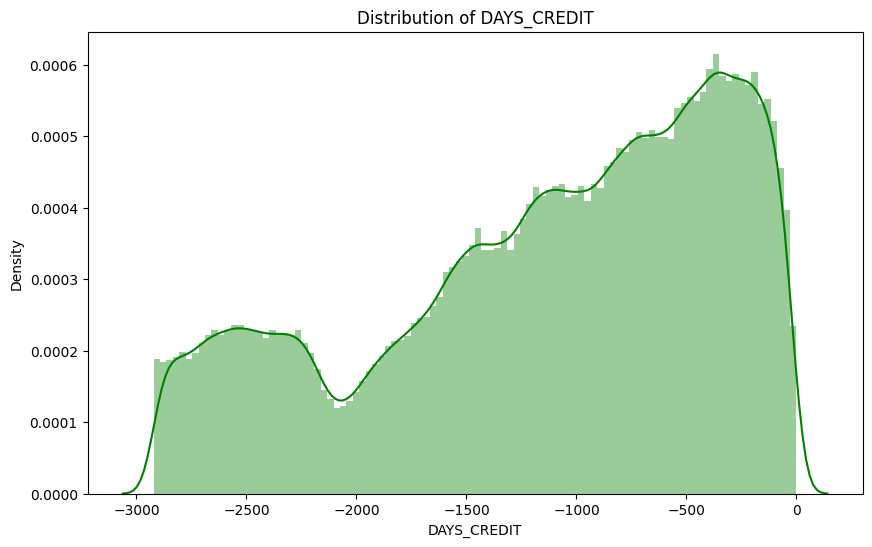

In [ ]:
def plot_b_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(application_bureau_train[feature].dropna(),color=color, kde=True,bins=100)
    plt.show() 
    
plot_b_distribution('DAYS_CREDIT','green')

Durasi kredit (dalam hari) berkisar antara kurang dari 3000 hari (dengan puncak lokal sekitar 2000 hari) dan dengan frekuensi yang meningkat untuk jumlah hari yang lebih pendek - dengan puncak sekitar 300 hari (kurang dari satu tahun).

In [ ]:
application_bureau_train['DAYS_CREDIT'].value_counts()

-364    1120
-273    1076
-336    1049
-357    1045
-371    1029
        ... 
-4        86
-3        65
-2        36
-1        13
 0         4
Name: DAYS_CREDIT, Length: 2923, dtype: int64

##CREDIT OVERDUE (CREDIT_DAY_OVERDUE)

<ipython-input-12-0f84f8d4ef3a>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




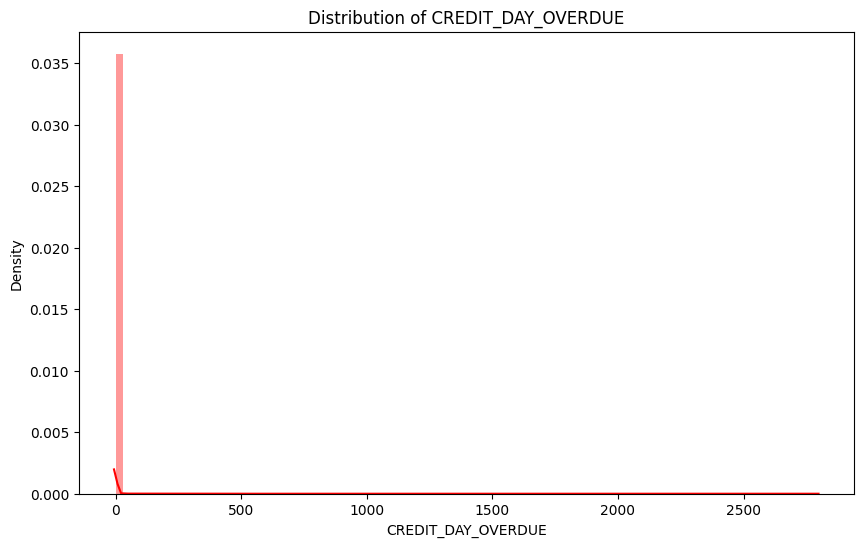

In [ ]:
plot_b_distribution('CREDIT_DAY_OVERDUE','red')

Sebagian besar pinjaman memiliki jumlah hari tunggakan sebesar 0 atau mendekati 0. Jumlah maksimum hari tunggakan adalah sekitar 3000 hari. Hal ini menunjukkan bahwa sebagian besar pinjaman dalam dataset memiliki riwayat pembayaran yang baik, dengan sedikit atau tanpa keterlambatan pembayaran. Namun, ada beberapa pinjaman yang mengalami keterlambatan pembayaran hingga 3000 hari, yang mungkin menunjukkan adanya masalah pembayaran pada pinjaman tersebut.

##CREDIT SUM (AMT_CREDIT_SUM)

<ipython-input-12-0f84f8d4ef3a>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




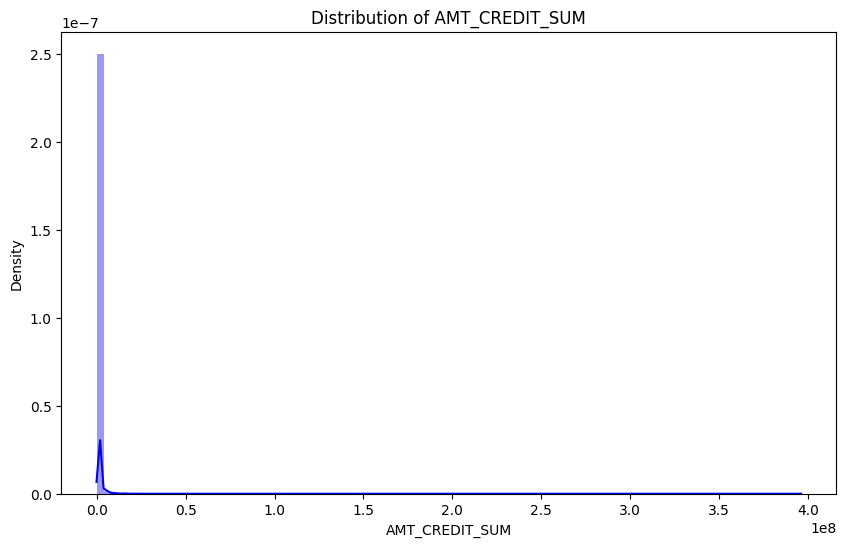

In [ ]:
plot_b_distribution('AMT_CREDIT_SUM','blue')

Distribusi AMT_CREDIT_SUM menunjukkan konsentrasi pinjaman pada rentang jumlah kredit yang lebih rendah.

Oleh karena itu, hapus outlier agar dapat melihat distribusi dengan lebih baik di sekitar angka 0. Kemudian, menggunakan fungsi untuk mengidentifikasi dan menyaring outlier dengan menggunakan ambang batas yang telah ditentukan sebelumnya.

Selanjutnya, modifikasi fungsi tersebut agar dapat menampilkan distribusi setelah menyaring outlier, sehingga dapat mengamati konsentrasi pinjaman di sekitar angka 0 dengan lebih efektif.

<ipython-input-19-407ca61b6f2d>:24: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

<ipython-input-19-407ca61b6f2d>:39: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




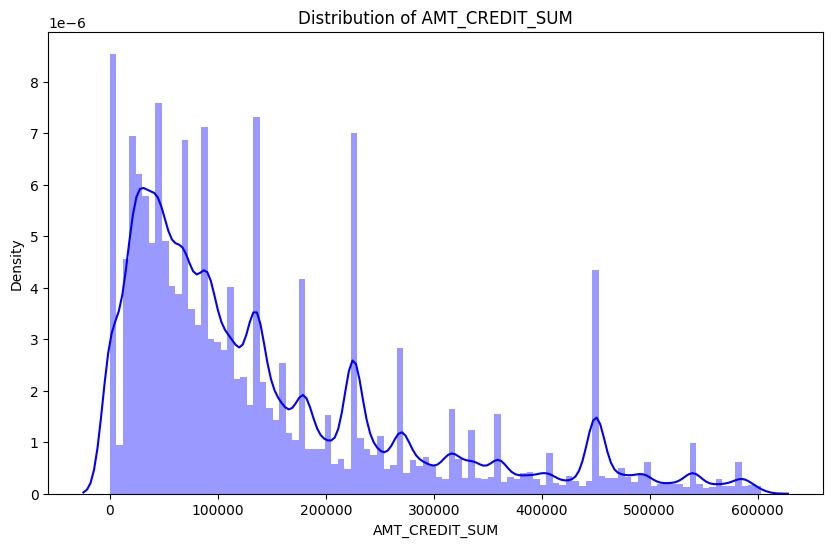

In [ ]:
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

def plot_b_o_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    x = application_bureau_train[feature].dropna()
    filtered = x[~is_outlier(x)]
    sns.distplot(filtered,color=color, kde=True,bins=100)
    plt.show() 

plot_b_o_distribution('AMT_CREDIT_SUM','blue')

Dari plot distribusi yang ditampilkan, dapat diamati bahwa terdapat beberapa puncak (peaks) dalam distribusi data. Konsentrasi nilai terbesar terdapat di sekitar 20.000, namun terdapat juga beberapa puncak lain pada nilai yang lebih tinggi.

Hal ini menunjukkan bahwa terdapat variasi dalam jumlah pinjaman yang terdaftar di Credit Bureau. Mayoritas pinjaman memiliki jumlah yang relatif rendah, tetapi ada juga sejumlah pinjaman yang memiliki nilai yang lebih tinggi.

Distribusi ini memberikan gambaran tentang bagaimana jumlah kredit terdistribusi di berbagai rentang nilai, dengan puncak-puncak yang menunjukkan kelompok pinjaman yang lebih umum terjadi pada rentang tertentu.

Penting untuk memperhatikan bahwa adanya puncak-puncak tersebut dapat memiliki makna atau implikasi tertentu terkait perilaku peminjam atau karakteristik kredit tertentu yang menyebabkan konsentrasi nilai pada rentang tersebut.

##Credit sum limit (AMT_CREDIT_SUM_LIMIT)

<ipython-input-12-0f84f8d4ef3a>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




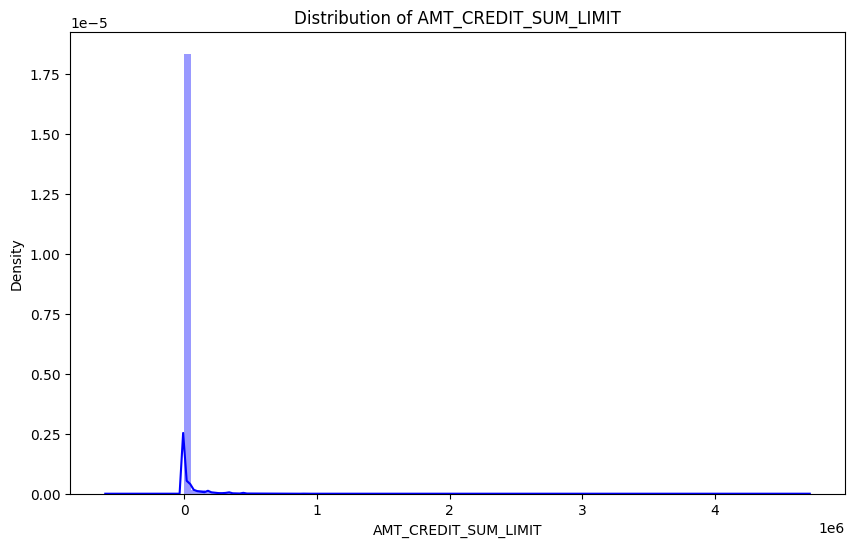

In [ ]:
plot_b_distribution('AMT_CREDIT_SUM_LIMIT','blue')

Comparison of interval values with TARGET = 1 and TARGET = 0

In [ ]:
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_b_distribution_comp(var,nrow=2):
    
    i = 0
    t1 = application_bureau_train.loc[application_bureau_train['TARGET'] != 0]
    t0 = application_bureau_train.loc[application_bureau_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

<ipython-input-21-300f3fd3a873>:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.


<ipython-input-21-300f3fd3a873>:16: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.


<ipython-input-21-300f3fd3a873>:15: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.


<ipython-input-21-300f3fd3a873>:16: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameter

<Figure size 640x480 with 0 Axes>

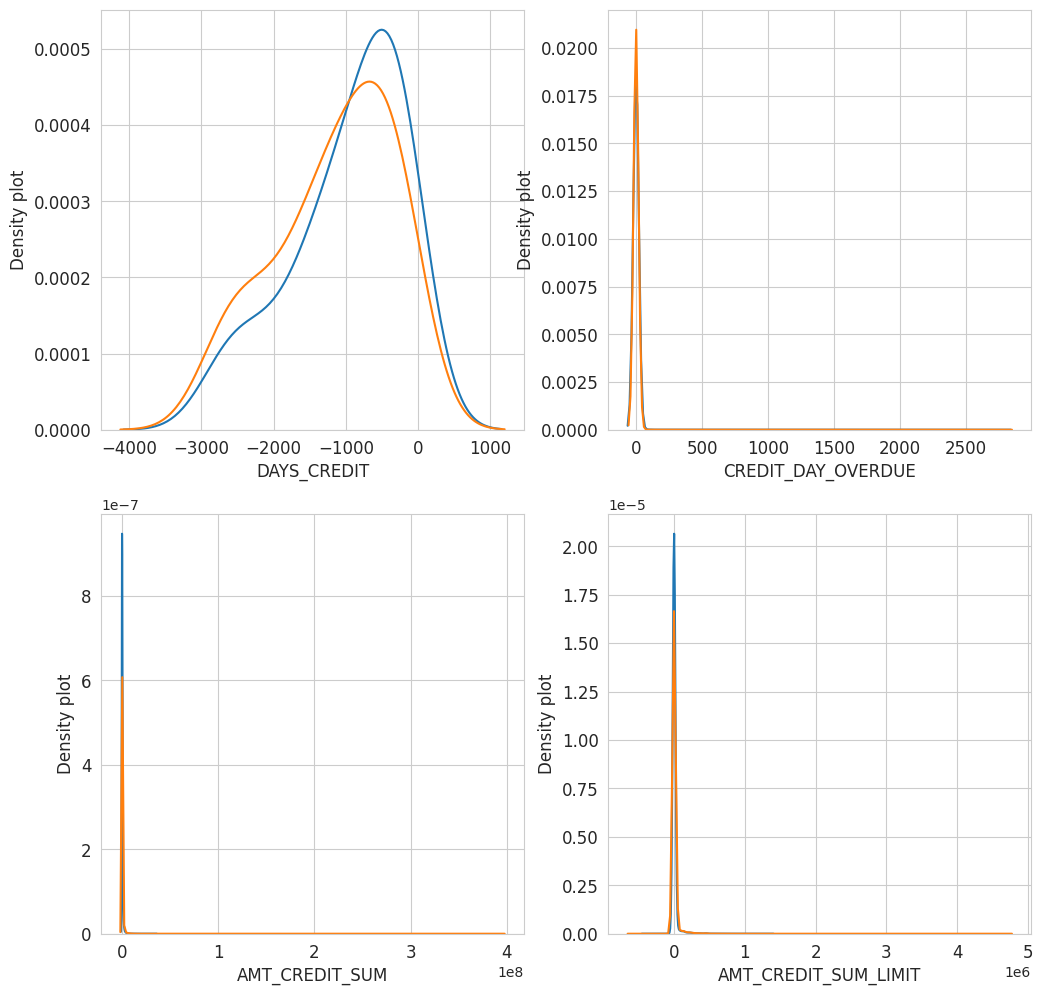

In [ ]:
var = ['DAYS_CREDIT','CREDIT_DAY_OVERDUE','AMT_CREDIT_SUM','AMT_CREDIT_SUM_LIMIT']

plot_b_distribution_comp(var, nrow=2)

*   Blue: TARGET=1
*   Red: TARGET=2

In [ ]:
# Categorical features
cat_feats=['account_status', 'age_status', 'year_join', 'payment_method']

# Plot categorical features
fig=plt.figure(figsize=(8,16))
for i, var_name in enumerate(cat_feats):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=dataset_copy, x=var_name, axes=ax, hue='churn_predict')
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

##Previous Application

In [ ]:
previous_application = pd.read_csv('/content/gdrive/MyDrive/Dataset/Project/previous_application.csv')
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

Contract Status Distribution in Previously Filed Applications

In [ ]:
t = previous_application['NAME_CONTRACT_STATUS'].value_counts()
labels = t.index
values = t.values

colors = ['#FEBFB3', '#E1396C', '#96D38C', '#D0F9B1']

trace = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent',
               textinfo='value',
               textfont=dict(size=12),
               marker=dict(colors=colors, line=dict(color='#000000', width=1)))


layout = go.Layout(title='Name Contract Status', height=400)
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)